In [1]:
import pandas as pd
import seaborn as s
import numpy as np
import matplotlib.pyplot as pt
import logging

In [2]:
file=pd.read_csv('cereal.csv')

In [3]:
file.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [18]:
file.name.unique()

array(['100% Bran', '100% Natural Bran', 'All-Bran',
       'All-Bran with Extra Fiber', 'Almond Delight',
       'Apple Cinnamon Cheerios', 'Apple Jacks', 'Basic 4', 'Bran Chex',
       'Bran Flakes', "Cap'n'Crunch", 'Cheerios', 'Cinnamon Toast Crunch',
       'Clusters', 'Cocoa Puffs', 'Corn Chex', 'Corn Flakes', 'Corn Pops',
       'Count Chocula', "Cracklin' Oat Bran", 'Cream of Wheat (Quick)',
       'Crispix', 'Crispy Wheat & Raisins', 'Double Chex', 'Froot Loops',
       'Frosted Flakes', 'Frosted Mini-Wheats',
       'Fruit & Fibre Dates; Walnuts; and Oats', 'Fruitful Bran',
       'Fruity Pebbles', 'Golden Crisp', 'Golden Grahams',
       'Grape Nuts Flakes', 'Grape-Nuts', 'Great Grains Pecan',
       'Honey Graham Ohs', 'Honey Nut Cheerios', 'Honey-comb',
       'Just Right Crunchy  Nuggets', 'Just Right Fruit & Nut', 'Kix',
       'Life', 'Lucky Charms', 'Maypo',
       'Muesli Raisins; Dates; & Almonds',
       'Muesli Raisins; Peaches; & Pecans', 'Mueslix Crispy Blend',
  

C:\Users\ViswanathaKrishnamur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


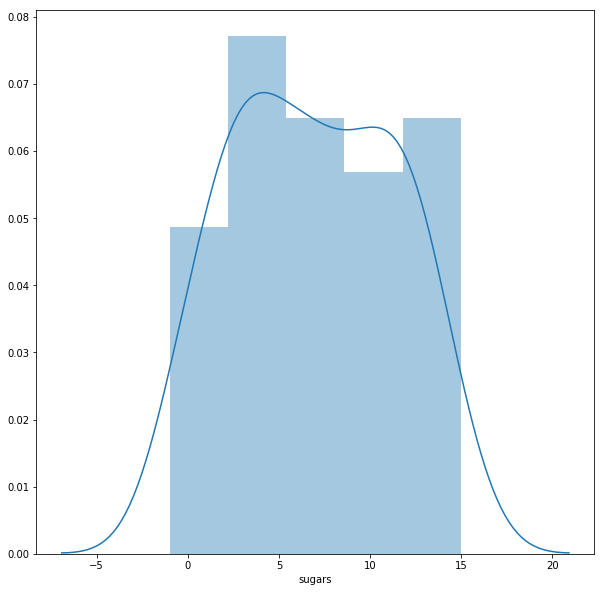

In [7]:
pt.figure(figsize=(10,10))
s.distplot(file.sugars)


C:\Users\ViswanathaKrishnamur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


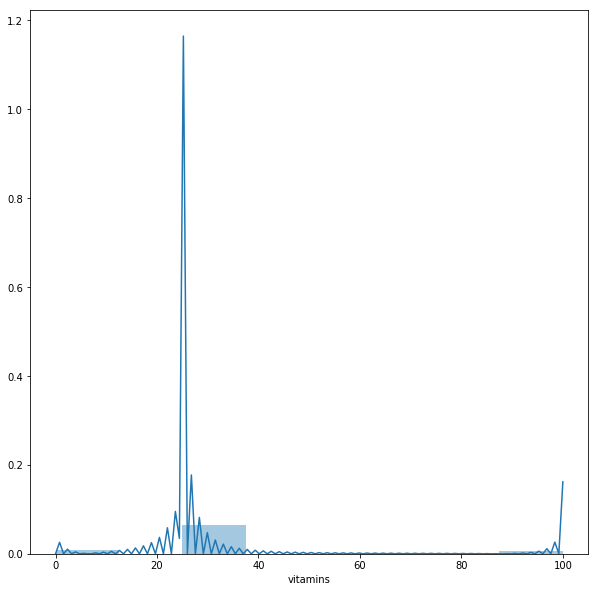

In [8]:
pt.figure(figsize=(10,10))
s.distplot(file.vitamins)

<Figure size 1440x2160 with 0 Axes>

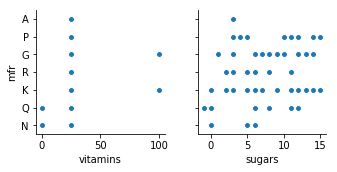

In [17]:
pt.figure(figsize=(20,30))
s.pairplot(file,x_vars=['vitamins','sugars'],y_vars='mfr')

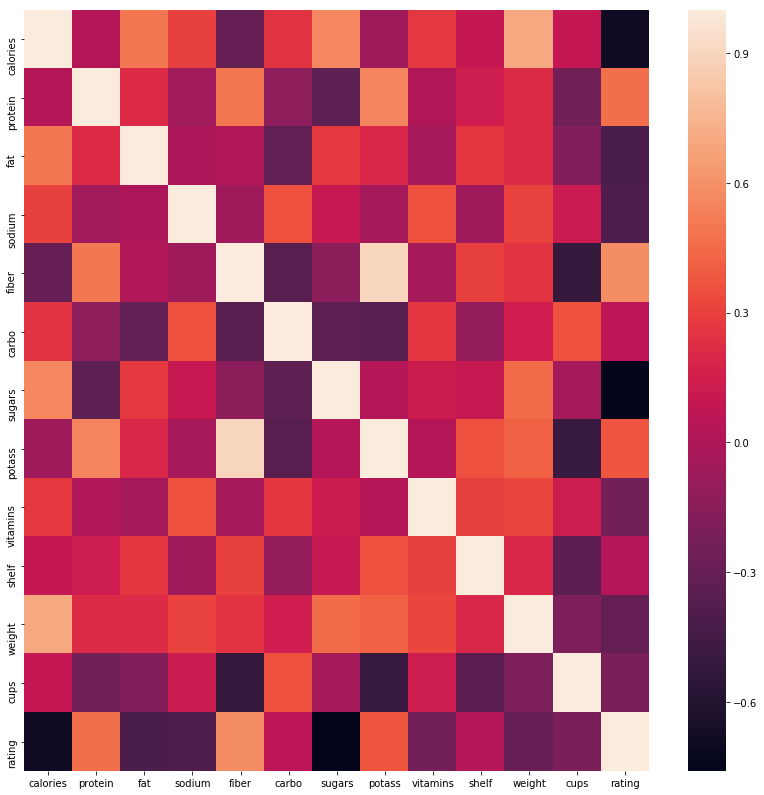

In [25]:
pt.figure(figsize=(14,14))
s.heatmap(file.corr())

In [26]:
mname={'N':'Nabisco','Q':'Quaker Oats','K':'Kellogs','R':'Raslston Purina','G':'General Mills','P':'Post','A':'American home food products'}

In [29]:
file['manufacturer']=file.mfr.map(mname)

In [30]:
file.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,manufacturer
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kellogs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kellogs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina


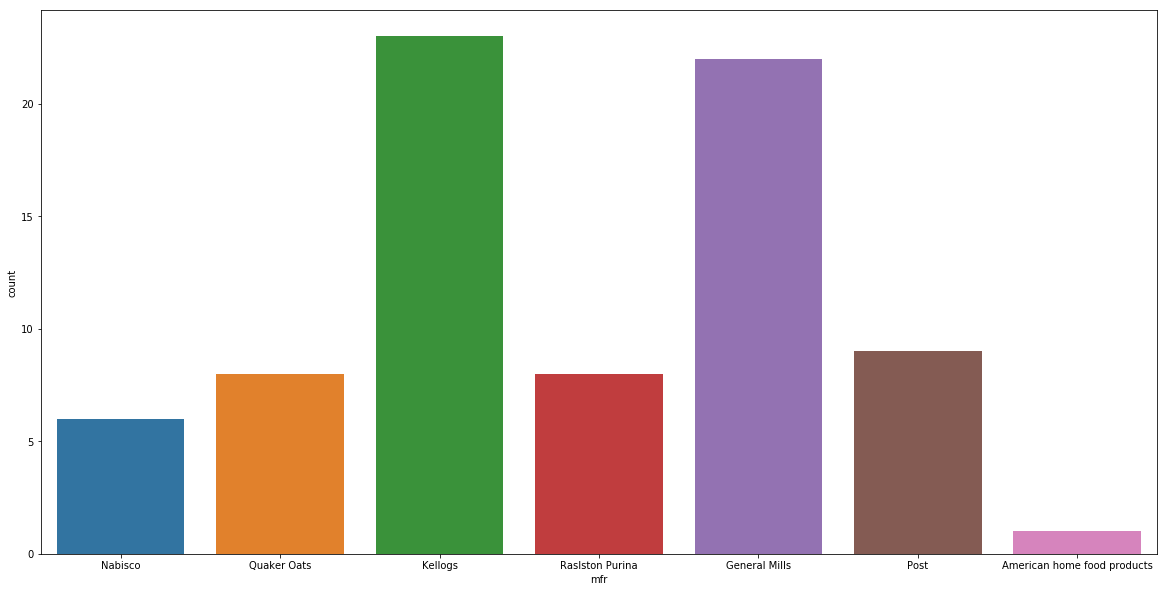

In [33]:
pt.figure(figsize=(20,10))
s.countplot(file.manufacturer)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
y=file.rating

In [43]:
x=file.select_dtypes(include='int64')

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [49]:
lr=LinearRegression()

In [50]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
predict=lr.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [58]:
print(np.sqrt(metrics.mean_squared_error(y_test, predict)))

4.36458053802014
